In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import torch
import torch.nn as nn

In [17]:
df = pd.read_csv('train.csv')

In [18]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [19]:
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [20]:
## Encoding categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Convert categorical label to binary numerical label
LabelEncoder = LabelEncoder()
X = X.copy()

# Encododing the label.
X['Geography'] = LabelEncoder.fit_transform(X['Geography'])
X['Gender'] = LabelEncoder.fit_transform(X['Gender'])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03


In [21]:
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [22]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [23]:
# Convert Pandas to Numpy array
X = X.values
y = y.values

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


In [24]:
# Convert Numpy array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [25]:
random_state = 123

# Split the training data set to training (70%) and testing set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state
)

print(X_train.dtype)

#  Split the testing data set for validation (50%) and test (50%)
X_test, X_vali, y_test, y_vali = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)


torch.float32


In [26]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
normal_scaler = MinMaxScaler()
X_train_normalized = normal_scaler.fit_transform(X_train)
X_vali_normalized = normal_scaler.transform(X_vali)
X_test_normalized = normal_scaler.transform(X_test)

# Convert to Tensor and rename the X variables
X_train = X_train_normalized = torch.tensor(X_train_normalized, dtype=torch.float32)
X_vali = X_vali_normalized = torch.tensor(X_vali_normalized, dtype=torch.float32)
X_test = X_test_normalized = torch.tensor(X_test_normalized, dtype=torch.float32)

In [27]:
# Check the size and type of datasets after the splitting
print("Training dataset")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [28]:
# Increase the dimension of all label variables
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
y_vali = y_vali.unsqueeze(1)

# Final check the datasets before feeding them to the model
print("Training dataset")
print(X_train.dtype, X_train.shape, type(X_train))
print(y_train.dtype, y_train.shape, type(y_train))

print("Validation dataset")
print(X_vali.dtype, X_vali.shape, type(X_vali))
print(y_vali.dtype, y_vali.shape, type(y_vali))

print("Testing dataset")
print(X_test.dtype, X_test.shape, type(X_train))
print(y_test.dtype, y_test.shape, type(y_train))

Training dataset
torch.float32 torch.Size([115523, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([115523, 1]) <class 'torch.Tensor'>
Validation dataset
torch.float32 torch.Size([24756, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24756, 1]) <class 'torch.Tensor'>
Testing dataset
torch.float32 torch.Size([24755, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24755, 1]) <class 'torch.Tensor'>


In [30]:
# To make sure we conduct a fair comparison between PyTorch and MatLab, We will use the same datasets to train, validate, and test the model on both 2 platforms
# I exported these tensors to CSV files and will upload them for training, validating, and testing in MATLAB.
# Please note that we don't need to run this block anymore. We need it only for the preprocessing of the data. 
# So, I freeze this block of code.

# Convert 6 datasets from Tensor back to Numpy
#X_train_ndarray = X_train.numpy()
#X_test_ndarray = X_test.numpy()
#X_vali_ndarray = X_vali.numpy()
#y_train_ndarray = y_train.numpy()
#y_test_ndarray = y_test.numpy()
#y_vali_ndarray = y_vali.numpy()

# Save all datasets to CSV file
#np.savetxt('X_train_ndarray.csv', X_train_ndarray, delimiter=',')
#np.savetxt('X_test_ndarray.csv', X_test_ndarray, delimiter=',')
#np.savetxt('X_vali_ndarray.csv', X_vali_ndarray, delimiter=',')
#np.savetxt('y_train_ndarray.csv', y_train_ndarray, delimiter=',')
#np.savetxt('y_test_ndarray.csv', y_test_ndarray, delimiter=',')
#np.savetxt('y_vali_ndarray.csv', y_vali_ndarray, delimiter=',')

In [31]:
# Define the structure of the Neural network model
input_features = 10
output_features = 1

# Define hyperparameters for using in grid search to find the best combination
learning_rates_grid = [0.01, 0.001, 0.0001]
hidden_neurons_grid = [10, 20, 30, 40]

# The number of epochs
number_of_epochs = 300

# Define the null variables to prepare for storing the result of the model
best_accuracy = 0.0
best_hyperparameters = {}

In [32]:
# Build the class for Neural network model
class Credit_Churn_NN_Model(nn.Module):
    def __init__(self, input_features, hidden_neurons, output_features):
        super(Credit_Churn_NN_Model, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_neurons)
        self.fc2 = nn.Linear(hidden_neurons, output_features)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        output_layer1 = self.fc1(x)
        l1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(l1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated


In [1]:
# Build the function for the model
def train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_vali, y_vali, number_of_epochs):
    model = Credit_Churn_NN_Model(input_features, hidden_neurons, output_features)
    criterion = torch.nn.BCELoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Define value holder for plotting in the graph
    plot_train_loss = []
    plot_vali_loss = []

    # Iterate the model e time. e start from 0 to number_of_epochs - 1
    for e in range(number_of_epochs):
        # Training the model
        model.train()
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train)
        train_loss.backward()
        optimizer.step()
        # append the loss value (Train) to the value holder
        plot_train_loss.append(train_loss)

        # Validation the model
        model.eval()
        with torch.no_grad():
            y_vali_pred = model(X_vali)
            vali_loss = criterion(y_vali_pred, y_vali)
            # append the loss value (Validation) to the value holder
            plot_vali_loss.append(vali_loss)

    return model, plot_train_loss, plot_vali_loss

In [34]:
# We will prepare the running time between Pytorch and MatLab
import time
# Start the timer
start_time = time.time()

# Grid search
for learning_rate in learning_rates_grid:
    for hidden_neurons in hidden_neurons_grid:
        print(f"\nTraining the NNet model with learning rate={learning_rate} and hidden_neurons={hidden_neurons}")
        # Call the function to train and evaluate the model with the nested loop
        trained_model, train_loss, vali_loss = train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_vali, y_vali, number_of_epochs)

        # After calling the train_NN_model() function, We'll get the trained model
        # We will evaluate the performance of this model by feeding X trained to the trained model

        # Preduct y from the X_train
        y_train_pred = (trained_model(X_train).detach().numpy() > 0.5).astype(int)
        # Calculate the accuracy rate of the model
        accuracy = (y_train_pred == y_train.numpy()).mean()
        #accuracy = (y_train_pred == y_train.numpy()).sum()/len(y_train)
        print(f"Accuracy rate is {accuracy}")

        # Check if the current hyperparameters yield a better performance
        if accuracy > best_accuracy: # if Yes
            best_accuracy = accuracy # Then reassign this hyperparameter's accuracy to the best_accuracy variable
            # And replace the best_hyperparameters with the new Lr and Neurons
            best_hyperparameters = {'learning_rate': learning_rate, 'hidden_neurons': hidden_neurons}
            # And replace the plot variable
            train_loss_for_plotting = train_loss
            vali_loss_for_plotting = vali_loss

# After the final of nested loop, print the highest one
print("\nThe Best Hyperparameters are ", best_hyperparameters)

# Stop the timer
end_time = time.time()
# Calculate the total time of running code
Total_time = end_time - start_time

print(f"Total time taken: {Total_time} seconds")


Training the NNet model with learning rate=0.01 and hidden_neurons=10
Accuracy rate is 0.8336088917358448

Training the NNet model with learning rate=0.01 and hidden_neurons=20
Accuracy rate is 0.8364221843269306

Training the NNet model with learning rate=0.01 and hidden_neurons=30
Accuracy rate is 0.8584697419561472

Training the NNet model with learning rate=0.01 and hidden_neurons=40
Accuracy rate is 0.8554833236671485

Training the NNet model with learning rate=0.001 and hidden_neurons=10
Accuracy rate is 0.7893752759190811

Training the NNet model with learning rate=0.001 and hidden_neurons=20
Accuracy rate is 0.795313487357496

Training the NNet model with learning rate=0.001 and hidden_neurons=30
Accuracy rate is 0.8066272517161085

Training the NNet model with learning rate=0.001 and hidden_neurons=40
Accuracy rate is 0.8068523151233954

Training the NNet model with learning rate=0.0001 and hidden_neurons=10
Accuracy rate is 0.7893752759190811

Training the NNet model with le

In [35]:
y_train_pred[:30]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [36]:
best_hyperparameters

{'learning_rate': 0.01, 'hidden_neurons': 30}

In [37]:
input_features = 10
best_learning_rate = best_hyperparameters['learning_rate']
best_hidden_neurons = best_hyperparameters['hidden_neurons']

print(best_learning_rate)
print(best_hidden_neurons)

0.01
30


In [38]:
train_loss_for_plotting

[tensor(0.6663, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6397, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6151, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5921, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5708, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5518, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5359, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5239, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5163, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5130, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5129, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5147, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5166, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5176, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5171, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5151, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5120, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5081, grad_fn=<BinaryCrossEntropyBackw

In [39]:
# Convert from Tensor to list to prepare for plotting with Matplotlib
# Because we can't plot the tensor variables with Matplotlib
train_loss_for_plotting = [tensor_item.item() for tensor_item in train_loss_for_plotting]
vali_loss_for_plotting = [tensor_item.item() for tensor_item in vali_loss_for_plotting]
print(type(train_loss_for_plotting))
print(type(vali_loss_for_plotting))

# Create a numpy list from 1 to the number of epochs
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)

<class 'list'>
<class 'list'>


numpy.ndarray

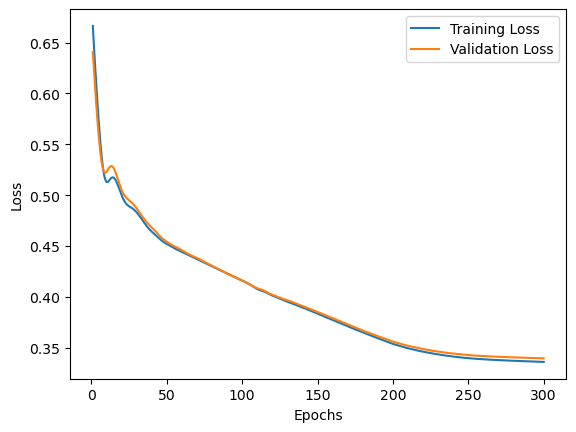

In [40]:
# Now, the type of train_loss_for_plotting and vali_loss_for_plotting are the list.
# We are ready to plot them in Matplotlib
plt.plot(Epochs, train_loss_for_plotting, label='Training Loss')
plt.plot(Epochs, vali_loss_for_plotting, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Testing data set

trained_model.eval()

# From sigmoid probabilities to y labels
y_test_pred =  trained_model(X_test)

# Calculate the accuracy rate
acc = (y_test_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 78.95%


In [42]:
y_test_pred[:30]

tensor([[0.3675],
        [0.3844],
        [0.4206],
        [0.4114],
        [0.4316],
        [0.3872],
        [0.4364],
        [0.3770],
        [0.3846],
        [0.4376],
        [0.4210],
        [0.3735],
        [0.4283],
        [0.4281],
        [0.3354],
        [0.4255],
        [0.4410],
        [0.3796],
        [0.4065],
        [0.3915],
        [0.3838],
        [0.4073],
        [0.4233],
        [0.4170],
        [0.4158],
        [0.4310],
        [0.3880],
        [0.4010],
        [0.4258],
        [0.3684]], grad_fn=<SliceBackward0>)

In [43]:
# Train the final model with the hyperparameters
# Get the best learning_rate and hidden_neurons
the_best_learning_rate = best_hyperparameters['learning_rate']
the_best_hidden_neurons = best_hyperparameters['hidden_neurons']

# Create new instant with for the final model with the best number of hidden_neurons
final_model = Credit_Churn_NN_Model(input_features, the_best_hidden_neurons, output_features)

# Create the optimize function with best number of learning_rate
optimizer = torch.optim.Adam(final_model.parameters(), lr=the_best_learning_rate)

# Loss function
criterion = torch.nn.BCELoss(reduction='mean')

# Feeding the final model with X_train
number_of_epochs = 300 
for epoch in range(number_of_epochs):
    final_model.train()
    optimizer.zero_grad()
    y_train_pred = final_model(X_train)
    loss = criterion(y_train_pred, y_train)
    loss.backward()
    optimizer.step()

# Validation Set with the final model
final_model.eval()
y_vali_pred =  trained_model(X_vali)
# Calculate the accuracy rate
acc = (y_vali_pred.round() == y_vali).float().mean()
acc = float(acc)
print("Final model - Validation set accuracy: %.2f%%" % (acc*100))


# Testing data set with the final model

final_model.eval()
y_test_pred =  trained_model(X_test)
# Calculate the accuracy rate
acc = (y_test_pred.round() == y_test).float().mean()
acc = float(acc)
print("Fianl model - Testing set accuracy: %.2f%%" % (acc*100))

Final model - Validation set accuracy: 78.28%
Fianl model - Testing set accuracy: 78.95%
